In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, adjusted_mutual_info_score,r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

### Delete the first and second columns (non-prodictive)

In [2]:
df_complete = pd.read_csv('OnlineNewsPopularity.csv')
df_train = pd.read_csv('OnlineNewsPopularity_train.csv')
df_test = pd.read_csv('OnlineNewsPopularity_test.csv')
df_train = df_train.drop(columns = ['url', 'timedelta'])
df_test = df_test.drop(columns = ['url', 'timedelta'])
df_train

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36639,12,1003,0.424949,1.0,0.630996,2,1,2,1,4.246261,...,0.100000,1.0,-0.246875,-0.500000,-0.125000,0.633333,-0.116667,0.133333,0.116667,1700
36640,12,872,0.424769,1.0,0.574109,11,6,18,0,4.746560,...,0.100000,0.7,-0.113426,-0.300000,-0.012500,0.000000,0.000000,0.500000,0.000000,1300
36641,14,1338,0.368024,1.0,0.532194,9,7,26,2,4.340807,...,0.033333,1.0,-0.445316,-1.000000,-0.050000,0.200000,-0.200000,0.300000,0.200000,1400
36642,14,217,0.516279,1.0,0.487342,13,2,8,1,4.824885,...,0.033333,0.8,-0.388889,-0.388889,-0.388889,0.734848,0.312121,0.234848,0.312121,1800


## STEP 1 Exam the completeness of the dataset

In [3]:
# print(df_train.info())
# print(df_test.info())

### Group the dataset into parts

In [3]:
#Group for training dataset.
df_num_train = df_train.iloc[:, [5, 6, 7, 8, 10]]
df_channel_train = df_train.iloc[:, 11:17]
df_kw_train = df_train.iloc[:, 17:26]
df_Mash_train = df_train.iloc[:, 26:29]
df_day_train = df_train.iloc[:, 29:37]
df_LDA_train = df_train.iloc[:, 37:42]
df_polarity_train = df_train.iloc[:, [43,48,49,50,51,52,53,54,55,57]]
df_words_train = df_train.iloc[:, [44,45,46,47]]
df_subjective_train = df_train.iloc[:, [42, 54, 56]]

#Group for testing dataset.
df_num_test = df_test.iloc[:, [5, 6, 7, 8, 10]]
df_channel_test = df_test.iloc[:, 11:17]
df_kw_test = df_test.iloc[:, 17:26]
df_Mash_test = df_test.iloc[:, 26:29]
df_day_test = df_test.iloc[:, 29:37]
df_LDA_test = df_test.iloc[:, 37:42]
df_polarity_test = df_test.iloc[:, [43,48,49,50,51,52,53,54,55,57]]
df_words_test = df_test.iloc[:, [44,45,46,47]]
df_subjective_test = df_test.iloc[:, [42, 54, 56]]

df_num_test

,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords
0,0,0,0,1,7
1,0,0,2,1,7
2,24,4,21,0,6
3,1,1,1,0,9
4,1,1,2,0,7
...,...,...,...,...,...
2995,9,7,1,1,8
2996,9,7,3,48,7
2997,24,1,12,1,8
2998,10,1,1,0,5


## Step 2 Predict the shares according to the parameters

### Prediction 1: Global features training

In [5]:
# Use MinMaxScaler to change the scale of [0, 1]
# min_max_scaler = MinMaxScaler(feature_range=[0, 1])

# train_minmax =  min_max_scaler.fit_transform(df_train)
# test_minmax = min_max_scaler.fit_transform(df_test)


# X_train, X_test, y_train, y_test = train_minmax[:, :-1], test_minmax[:, :-1], train_minmax[:, -1], test_minmax[:, -1]
X_train, X_test, y_train, y_test = df_train.iloc[:, :-1], df_test.iloc[:, :-1], df_train.iloc[:, -1], df_test.iloc[:, -1]

#Build the regression model
reg_global = linear_model.LinearRegression()
# reg_global = linear_model.LogisticRegression()

performance = reg_global.fit(X_train, y_train.astype(int))

#Predict
prediction_global = reg_global.predict(X_test)


#Print options
np.set_printoptions(precision=3, suppress = True)
coef = reg_global.coef_
intercept = reg_global.intercept_
#Coefficient
print("Coefficient:", coef)

#Intercept
print("Intercept:", intercept)

#Score
print('Score of train:', performance.score(X_train, y_train))
print("Score of test:", performance.score(X_test, y_test))
print('Score of prediction:', r2_score(y_test, prediction_global))

Coefficient: [    92.206      0.569   3684.475   -587.944  -1524.955     29.943
    -61.923     12.341     10.087   -593.988     37.938   -951.702
  -1135.89    -746.721   -587.325   -490.912   -416.405      2.155
      0.104     -0.451     -0.002     -0.        -0.001     -0.393
     -0.211      1.721      0.028      0.007     -0.009    350.751
   -190.616     43.226   -207.271   -177.462    307.835   -126.473
    181.364 972884.473 971879.536 971569.797 972403.054 972361.958
   2549.599    780.715 -14067.052   2281.569   2083.477   2014.495
  -1483.521  -2137.753    229.871  -1809.47     166.176   -265.925
    -17.862    213.052    656.116    675.511]
Intercept: -973833.415417223
Score of train: 0.02279020692052891
Score of test: 0.023427211048236418
Score of prediction: 0.023427211048236418


In [6]:
#MAE, MSE measure
print("MAE = ", mean_absolute_error(prediction_global, y_test))
print("MSE = ", mean_squared_error(prediction_global, y_test))

# Adjusted_mutual_info_score
print("Adjusted mutual info score = ", adjusted_mutual_info_score(y_test, prediction_global))

#The coefficient of determination (1 is the best)
print("Coefficient of determination:%.2f"%(r2_score(y_test, prediction_global)))


MAE =  2856.7881175183056
MSE =  70511141.44670393


/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


Adjusted mutual info score =  8.720657483792108e-12
Coefficient of determination:0.02


In [8]:
# Use random forest to see analyse
seed = 0
params = {
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
}

rf = RandomForestClassifier()
rs = RandomizedSearchCV(rf, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
rs.fit(X_train, y_train.astype(int))


/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [12]:
print(rs.best_params_)

{'n_estimators': 10, 'criterion': 'gini'}


In [20]:
rf = RandomForestClassifier(**rs.best_params_)
rf.fit(X_train, y_train.astype(int))
rf.pred = rf.predict(X_test)

Text(0.5, 0, 'Relative Importance')

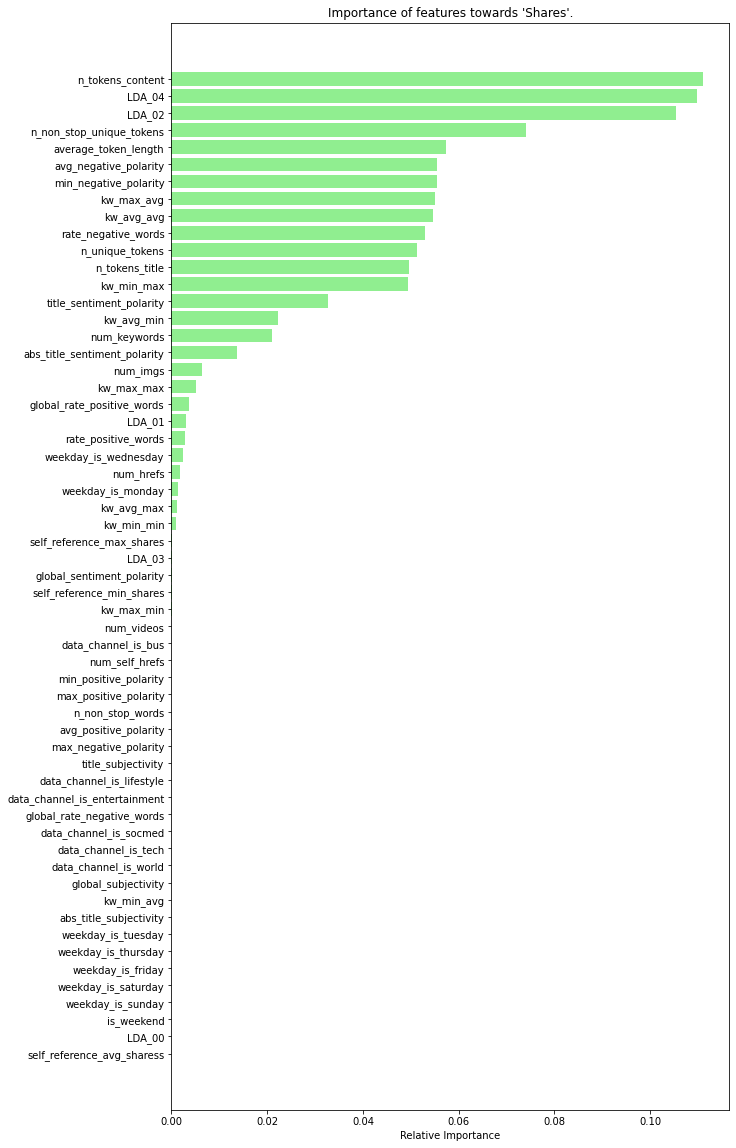

In [25]:
features = df_train.columns[:-1]
importance = rf.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize = (10, 20))
plt.title("Importance of features towards 'Shares'.")
plt.barh(range(len(indices)), importance[indices], color="lightgreen", align="center")
plt.yticks(range(len(indices)),features[indices])
plt.xlabel("Relative Importance")

### Prediction 2: number of the content

In [14]:
X_num_train, X_num_test, y_train, y_test = df_num_train, df_num_test, df_train.iloc[:, -1], df_test.iloc[:, -1]


# Use linear regression to predict 
reg_1 = linear_model.LinearRegression()
# reg_1 = linear_model.LogisticRegression()
performance = reg_1.fit(df_num_train, y_train)

prediction_1 = reg_1.predict(df_num_test)

#Print options
np.set_printoptions(precision=3, suppress = True)
coef = reg_1.coef_
intercept = reg_1.intercept_
#Coefficient
print("Coefficient:", coef)

#Intercept
print("Intercept:", intercept)

Coefficient: [ 50.157 -94.164  43.618  71.445  90.573]
Intercept: 2248.8577877384314


f(x) = 59.163 x<sub>1</sub> + 0.091 x<sub>2</sub> + 5443.294x<sub>3</sub> - 2490.564x<sub>4</sub> - 1876.821x<sub>5</sub> + 60.083x<sub>6</sub> - 82.166x<sub>7</sub> + 47.816x<sub>8</sub> + 63.678x<sub>9</sub> - 144.054x<sub>10</sub> + 90.484x<sub>11</sub> + 2880.035

In [15]:
#MAE, MSE measure
print("MAE = ", mean_absolute_error(prediction_1, y_test))
print("MSE = ", mean_squared_error(prediction_1, y_test))

# Adjusted_mutual_info_score
print("Adjusted mutual info score = ", adjusted_mutual_info_score(y_test, prediction_1))

#The coefficient of determination (1 is the best)
print("Coefficient of determination:%.2f"%(r2_score(prediction_1, y_test)))

# y_test_acc = prediction_1 = []
# for i in range(len(y_test)):
#     y_test_acc.append(int(y_test[i]))
#     prediction_1.append(int(prediction_1[i]))

#Accuracy score (To perform the ratio(number) of correct classification)
# print("Accuracy score:", accuracy_score(y_test_acc, prediction_1))



MAE =  3024.441680993524
MSE =  72970606.98206775


/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


Adjusted mutual info score =  -0.003929696210062695
Coefficient of determination:-113.18


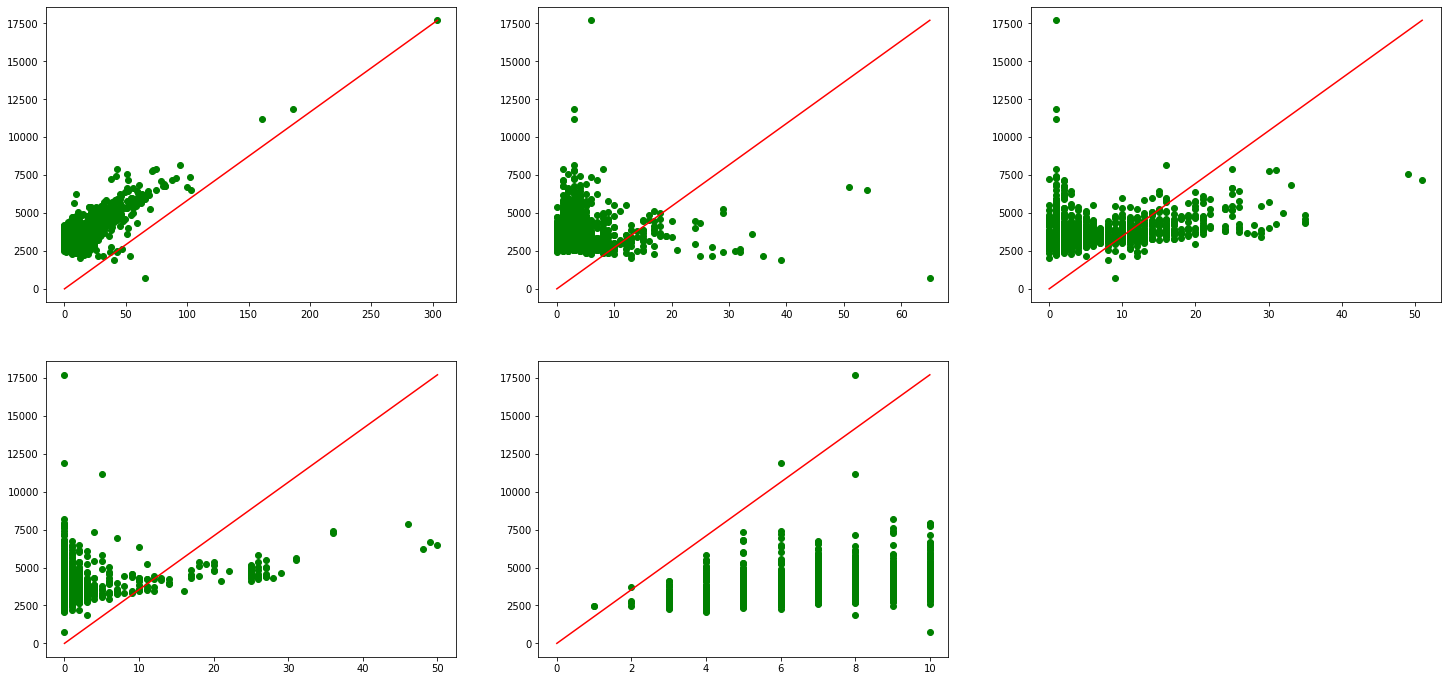

In [23]:
#Draw the graph
## Plot chart
x = np.arange(5, 5000)
y = x

columns = X_num_train.columns
plt.figure(figsize=(25,25))
num = 1
for column in columns:
    X_num_test_column = X_num_test[column]
#     print(y_test)
    plt.subplot(4,3,num)
    X_num_plot = np.linspace(0, max(X_num_test_column))
    y_num_plot = np.linspace(0, max(prediction_1))
    plt.scatter(X_num_test_column, prediction_1, c='g')
    plt.plot(X_num_plot, y_num_plot, c='r')
    num += 1
    
plt.show()

#### Summary: this model does not fit the data ( the prediction accuracy is not high enough )

### Analytics 2 Publish Channel

#### Set the median number as the standard for the factor "Popular" or "Unpopular".

In [24]:
median = df_complete['shares'].median()
print(median)

1400.0


In [25]:
## Function for labeling
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2. -0.08, 1.01*height, "%s" % int(height), size=10, family="Times new roman")

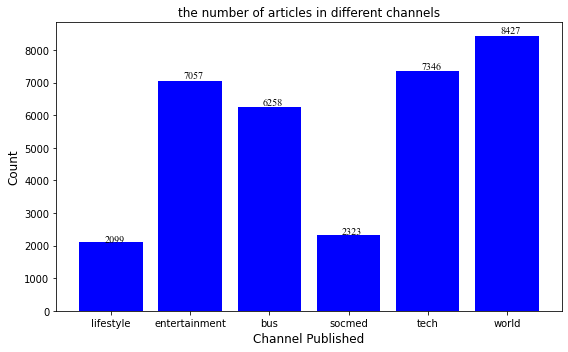

In [26]:
## Bar chart to count the number of articles in different channels.
sector = df_channel_train.columns
channel_count = df_complete[sector].sum().values

fig = plt.figure(figsize = (8,5))
fig_channel = plt.bar(np.arange(len(sector)), channel_count, align='center', color='b')
autolabel(fig_channel)
plt.title("the number of articles in different channels")
plt.xticks(np.arange(len(sector)), ['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world'])
plt.xlabel('Channel Published',size=12)
plt.ylabel('Count', size=12)
plt.tight_layout()
plt.show()

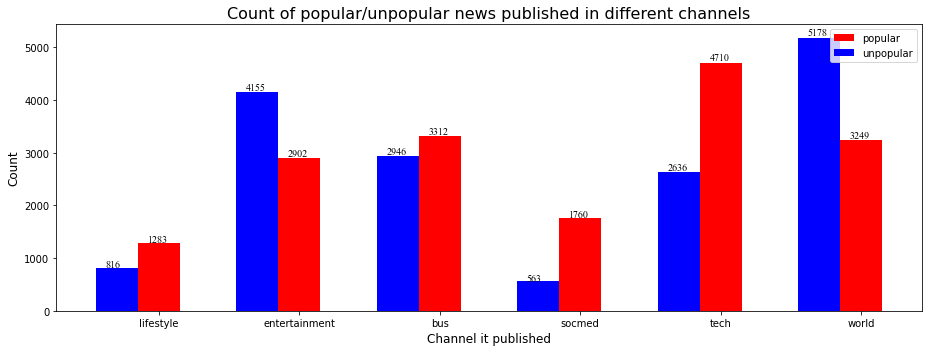

In [27]:
## Bar chart to count the number of popular/unpopular articles in different channels
unpop = df_complete[df_complete['shares'] < median]
pop = df_complete[df_complete['shares'] >= median]

unpop_sec = unpop[sector].sum().values
pop_sec = pop[sector].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news published in different channels", fontsize = 16)
fig_popular = plt.bar(np.arange(len(sector)), pop_sec, width = 0.3, align="center", color = 'r', \
          label = "popular")
fig_unpopular = plt.bar(np.arange(len(sector)) - 0.3, unpop_sec, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
autolabel(fig_popular)
autolabel(fig_unpopular)
plt.xticks(np.arange(len(sector)), ['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world'])
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Channel it published", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

### Analytics 3 Publish day

#### Also set the median number as the standard for the factor "Popular" or "Unpopular".

In [28]:
median

1400.0

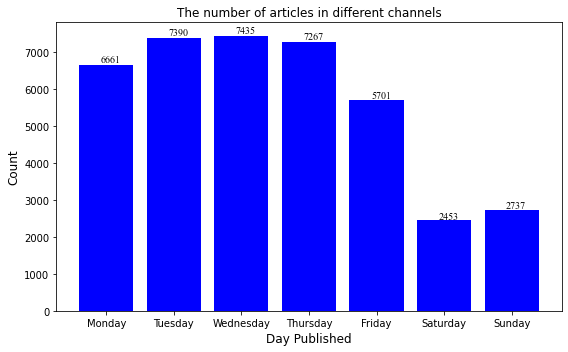

In [29]:
## Bar chart to count the number of articles in different day of the week.
day = df_day_train.columns[:-1]
day_count = df_complete[day].sum().values

fig = plt.figure(figsize = (8,5))
fig_day = plt.bar(np.arange(len(day)), day_count, align='center', color='b')
autolabel(fig_day)
plt.title("The number of articles in different channels")
plt.xticks(np.arange(len(day)), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day Published',size=12)
plt.ylabel('Count', size=12)
plt.tight_layout()
plt.show()

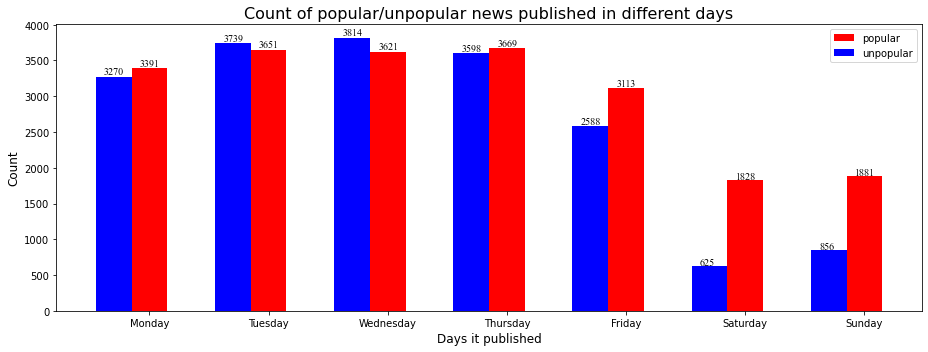

In [30]:
## Bar chart to count the number of popular/unpopular articles published in different days

unpop_days = unpop[day].sum().values
pop_days = pop[day].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news published in different days", fontsize = 16)
fig_popular = plt.bar(np.arange(len(day)), pop_days, width = 0.3, align="center", color = 'r', \
          label = "popular")
fig_unpopular = plt.bar(np.arange(len(day)) - 0.3, unpop_days, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
autolabel(fig_popular)
autolabel(fig_unpopular)
plt.xticks(np.arange(len(day)), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days it published", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

#### Prediction model (Publish Area)

In [85]:
X_channel_train, X_channel_test = df_channel_train.iloc[:, :-1], df_channel_test.iloc[:, :-1]

reg_channel = linear_model.LinearRegression()
reg_channel.fit(X_channel_train, y_train)
prediction_channel = reg_channel.predict(X_channel_test)

#Regression Function
#Print options
np.set_printoptions(precision=3, suppress = True)
coef = reg_channel.coef_
intercept = reg_channel.intercept_
#Coefficient
print("Coefficient:", coef)

#Intercept
print("Intercept:", intercept)

#Analysis
print("MSE", mean_squared_error(y_test, prediction_channel))
print("MAE", mean_absolute_error(y_test, prediction_channel))
# Adjusted_mutual_info_score
print("Adjusted mutual info score = ", adjusted_mutual_info_score(y_test, prediction_channel))

Coefficient: [-101.591 -884.805 -759.052 -207.504 -778.926]
Intercept: 3875.308152465678
MSE 72345353.08452281
MAE 3106.76461424026
Adjusted mutual info score =  -0.0031067925280104116


/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### Prediction model (Publish Day)

In [82]:
X_day_train, X_day_test = df_day_train.iloc[:, :-1], df_day_test.iloc[:, :-1]

reg_day = linear_model.LinearRegression()
reg_day.fit(X_day_train, y_train)
prediction_day = reg_day.predict(X_day_test)

#Regression Function
#Print options
np.set_printoptions(precision=3, suppress = True)
coef = reg_day.coef_
intercept = reg_day.intercept_
#Coefficient
print("Coefficient:", coef)

#Intercept
print("Intercept:", intercept)

#Analysis
print("MSE", mean_squared_error(y_test, prediction_day))
print("MAE", mean_absolute_error(y_test, prediction_day))
# Adjusted_mutual_info_score
print("Adjusted mutual info score = ", adjusted_mutual_info_score(y_test, prediction_day))

Coefficient: [1.261e+15 1.261e+15 1.261e+15 1.261e+15 1.261e+15 1.261e+15 1.261e+15]
Intercept: -1260588837379584.5
MSE 72331158.199625
MAE 3037.786833333333
Adjusted mutual info score =  -0.0045741602114579005


/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### Combine Model (Boolean Features)